# Wigner-Ville Distribution

In [1]:
using PyPlot
plt = PyPlot

PyPlot

For the conventient, we set some background parameter.

In [2]:
Fs = 100;
N = 100;
T = 1/Fs;
t = T:T:N*T;

## Interpolation

In [3]:
function interp_da(x)
  N = length(x)::Int;
  N_over_2 = convert(Int, N/2);

  x_fft = fft(x);
  y_fft = zeros(Complex{Float64}, 2*N);
  y_fft[1:N_over_2-1] = 2*x_fft[1:N_over_2-1];
  y_fft[3*N_over_2+1:2*N] = 2*x_fft[N_over_2+1:N];
  y_fft[N_over_2] = x_fft[N_over_2];
  y_fft[3*N_over_2] = x_fft[N_over_2];

  y = ifft(y_fft);
  return y
end

interp_da (generic function with 1 method)

## Hilbert Transform

In [4]:
function Hilbert_da(x)
  N = length(x);
  x_fft = fft(x);
  N_over_2 = convert(Int, N/2);
  x_fft[N_over_2:end] = 0;
  x_fft[1:N_over_2] = 2*x_fft[1:N_over_2];
  x1 = ifft(x_fft);
  return x1
end

Hilbert_da (generic function with 1 method)

## Wigner-Ville Distribution


In [15]:
function WVD_da(x)
  N = length(x)::Int;
  y = interp_da(x);
  y = Hilbert_da(y);
  yy = [y;y;y];
  W = zeros(Complex{Float64}, 2*N,N);
  for n = 1:N
    for p = 0:(2*N-1)
      W[p+1,n] = yy[2*n+p-N+2*N] * conj(yy[2*n-p+N+2*N]);
    end
  end
  WW = real(fft(W,1)); WW = WW[1:N,:];
  return WW
end

WVD_da (generic function with 1 method)

In [16]:
function WVD_da1(x)
  N = length(x)::Int;
  y = interp_da(x);
  y = Hilbert_da(y);
  yy = [y;y;y];
  yy[1:2*N] = 0;
  yy[4*N+1:end] = 0;
  W = zeros(Complex{Float64}, 2*N,N);
  for n = 1:N
    for p = 0:(2*N-1)
      W[p+1,n] = yy[2*n+p-N+2*N] * conj(yy[2*n-p+N+2*N]);
    end
  end
  WW = real(fft(W,1)); WW = WW[1:N,:];
  return WW
end

WVD_da1 (generic function with 1 method)

### Version 1
With complete circular convolution.

In [7]:
function WVD_da2(x)
  N = length(x)::Int;
  y = interp_da(x);
  y = Hilbert_da(y);
  yy = [y;y;y];
  W = zeros(Complex{Float64}, 2*N,N);
  for n = 1:N
    for p = 0:(2*N-1)
      W[p+1,n] = yy[2*n+p-N+2*N] * conj(yy[2*n-p+N+2*N]);
    end
  end
  W = W[N+1:end,:];
  WW = real(fft(W,1));
  return WW
end

WVD_da2 (generic function with 1 method)

### Version 2
With incomplete circular convolution.

In [8]:
function WVD_da3(x)
  N = length(x)::Int;
  y = interp_da(x);
  y = Hilbert_da(y);
  yy = [y;y;y];
  yy[1:2*N] = 0;
  yy[4*N+1:end] = 0;
  W = zeros(Complex{Float64}, 2*N,N);
  for n = 1:N
    for p = 0:(2*N-1)
      W[p+1,n] = yy[2*n+p-N+2*N] * conj(yy[2*n-p+N+2*N]);
    end
  end
  W = W[N+1:end,:];
  WW = real(fft(W,1));
  return WW
end

WVD_da3 (generic function with 1 method)

### Numerical Experiment
First signal is a 10Hz sine function. Second signal is a chirp signal with a 10Hz sine function.
$$x_1 = \sin(2\pi\times 10t),\quad x_2 = \sin(2\pi\times 25t^2) + \sin(2\pi\times 10t).$$

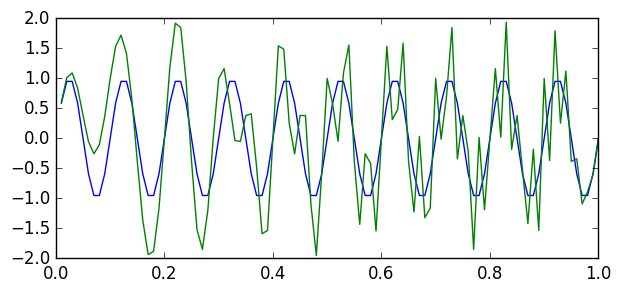

In [9]:
fig = plt.figure("pyplot_subplot",figsize=(7,3))
plt.subplot(111);
x1 = sin(2*pi*10*t);
x2 = sin(2*pi*25*t.^2) + sin(2*pi*10*t);
plt.plot(t,x1);
plt.plot(t,x2);

In [17]:
W1_1 = WVD_da(x1);
W1_2 = WVD_da1(x1);
W1_3 = WVD_da2(x1);
W1_4 = WVD_da3(x1);

W2_1 = WVD_da(x2);
W2_2 = WVD_da1(x2);
W2_3 = WVD_da2(x2);
W2_4 = WVD_da3(x2);

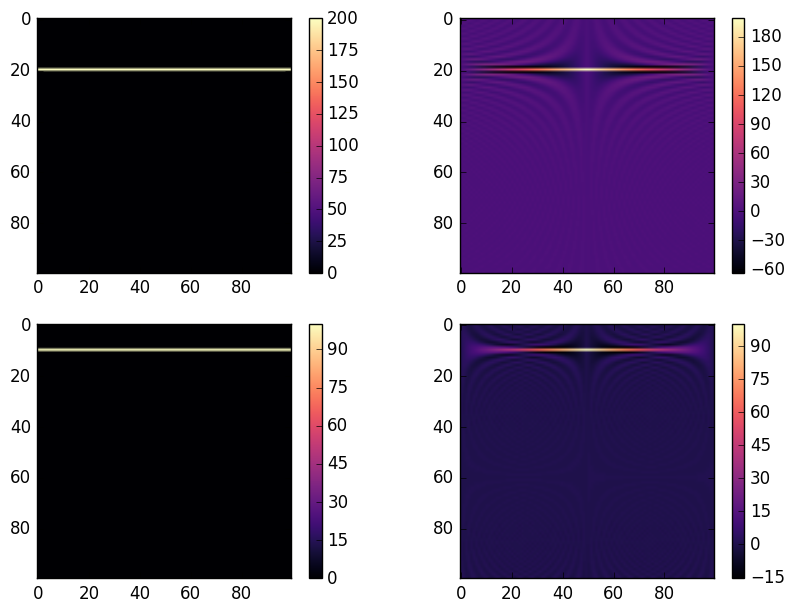

In [57]:
fig = plt.figure("pyplot_subplot",figsize=(10,7));
plt.subplot(221);
plt.imshow(W1_1, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(222);
plt.imshow(W1_2, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(223);
plt.imshow(W1_3, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(224);
plt.imshow(W1_4, cmap=ColorMap("magma"));
colorbar();

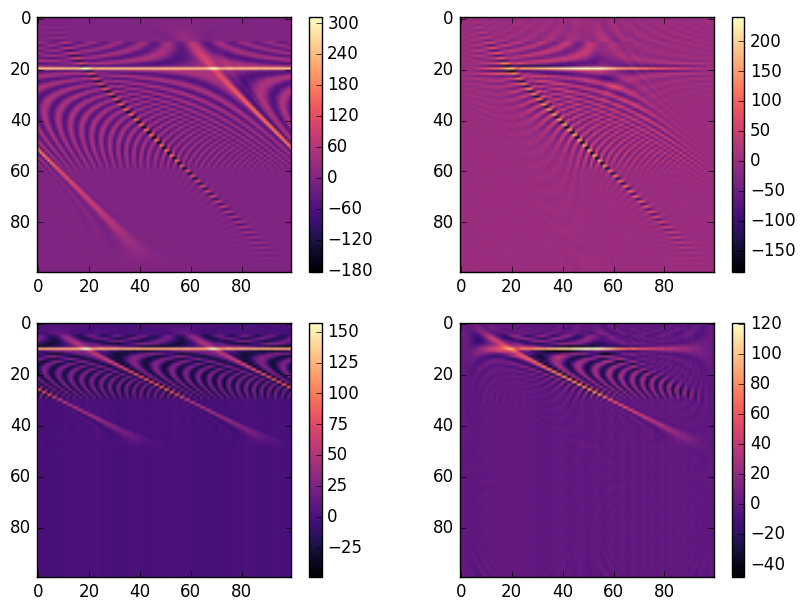

In [56]:
fig = plt.figure("pyplot_subplot",figsize=(10,7));
plt.subplot(221);
plt.imshow(W2_1, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(222);
plt.imshow(W2_2, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(223);
plt.imshow(W2_3, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(224);
plt.imshow(W2_4, cmap=ColorMap("magma"));
colorbar();

In [23]:
x3 = sin(2*pi*10*t); x3[1:20] = 0;
W3_1 = WVD_da(x3);
W3_2 = WVD_da1(x3);
W3_3 = WVD_da2(x3);
W3_4 = WVD_da3(x3);

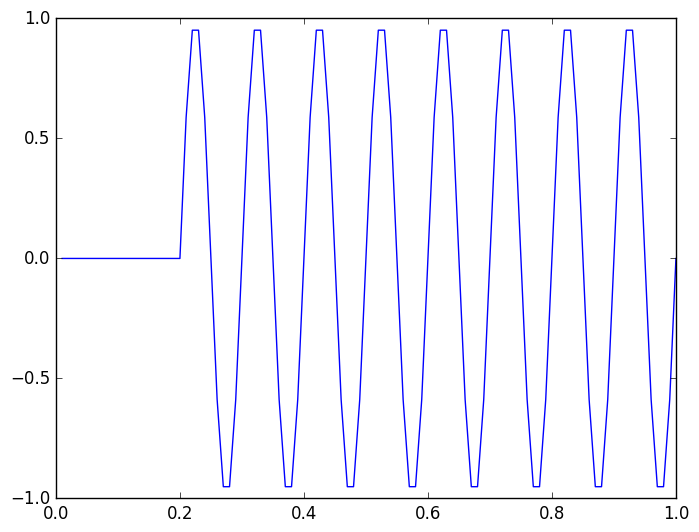

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x321f76f98>

In [24]:
plot(t,x3)

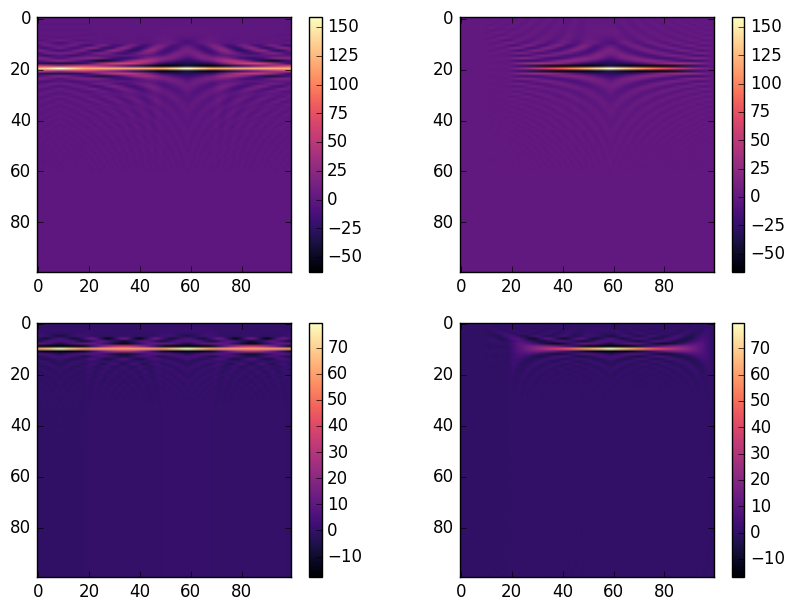

In [55]:
fig = plt.figure("pyplot_subplot",figsize=(10,7));
plt.subplot(221);
plt.imshow(W3_1, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(222);
plt.imshow(W3_2, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(223);
plt.imshow(W3_3, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(224);
plt.imshow(W3_4, cmap=ColorMap("magma"));
colorbar();

In [26]:
x4 = zeros(N); x4[30] = 1;
W4_1 = WVD_da(x4);
W4_2 = WVD_da1(x4);
W4_3 = WVD_da2(x4);
W4_4 = WVD_da3(x4);

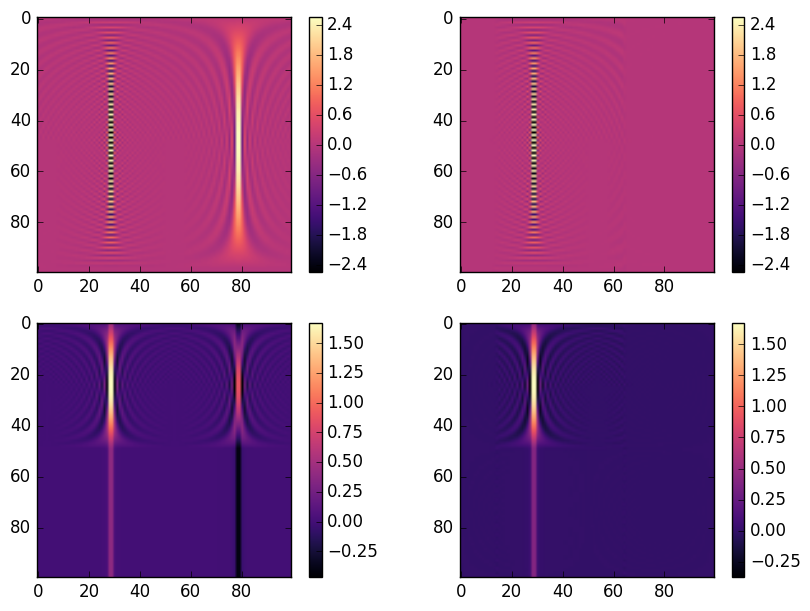

In [54]:
fig = plt.figure("pyplot_subplot",figsize=(10,7));
plt.subplot(221);
plt.imshow(W4_1, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(222);
plt.imshow(W4_2, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(223);
plt.imshow(W4_3, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(224);
plt.imshow(W4_4, cmap=ColorMap("magma"));
colorbar();

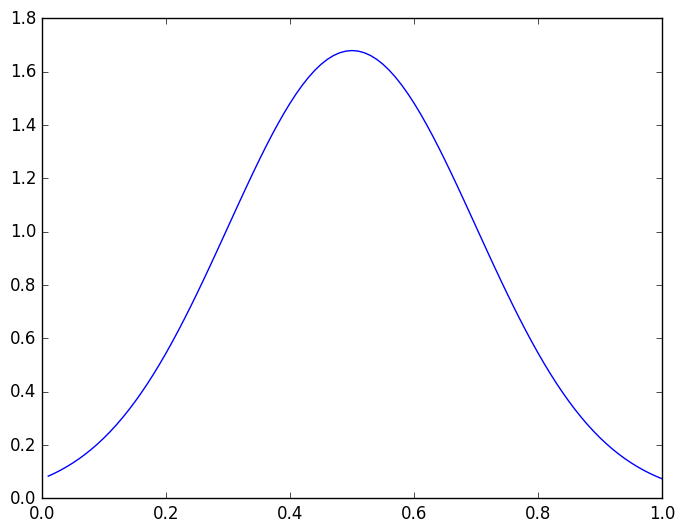

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3255991d0>

In [71]:
sigma = 0.2;
x5 = (sigma^2*pi)^(-1/4) * exp(-1 * (t-0.5).^2 / (2*sigma^2));
plot(t,x5)

In [72]:
W5_1 = WVD_da(x5);
W5_2 = WVD_da1(x5);
W5_3 = WVD_da2(x5);
W5_4 = WVD_da3(x5);

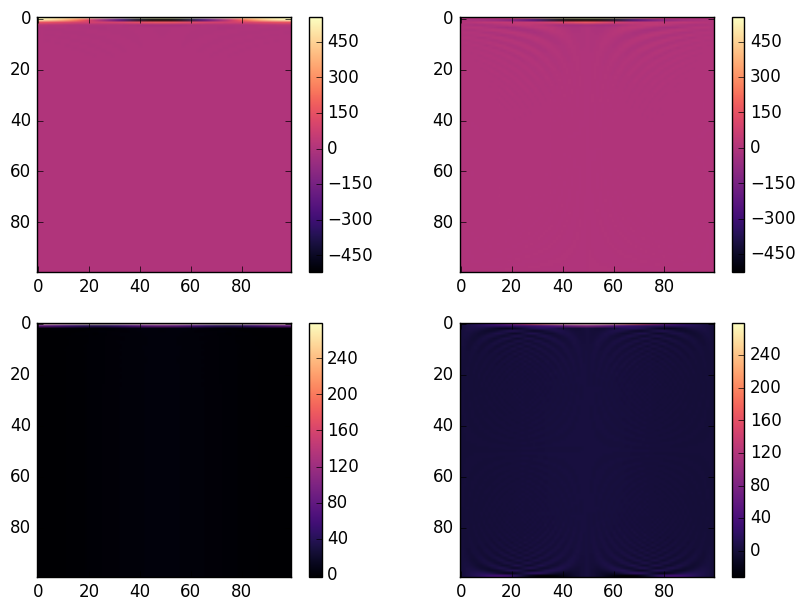

In [73]:
fig = plt.figure("pyplot_subplot",figsize=(10,7));
plt.subplot(221);
plt.imshow(W5_1, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(222);
plt.imshow(W5_2, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(223);
plt.imshow(W5_3, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(224);
plt.imshow(W5_4, cmap=ColorMap("magma"));
colorbar();

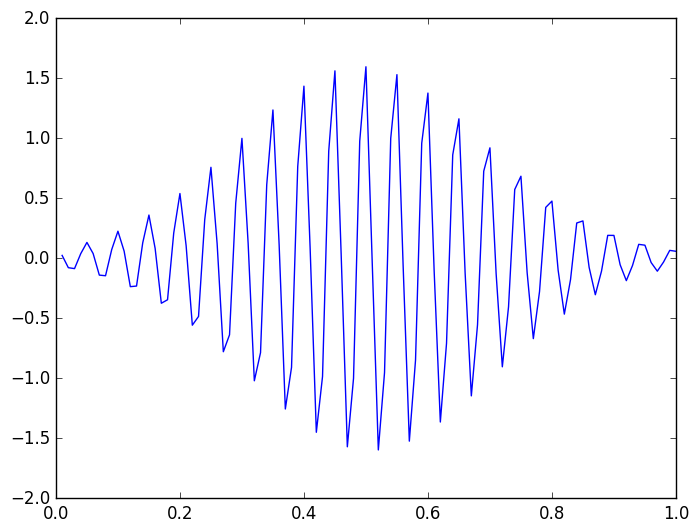

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3247674e0>

In [77]:
x6 = x5.*exp(1im*2*pi*20.1*t);
plot(t,real(x6))

In [78]:
W6_1 = WVD_da(x6);
W6_2 = WVD_da1(x6);
W6_3 = WVD_da2(x6);
W6_4 = WVD_da3(x6);

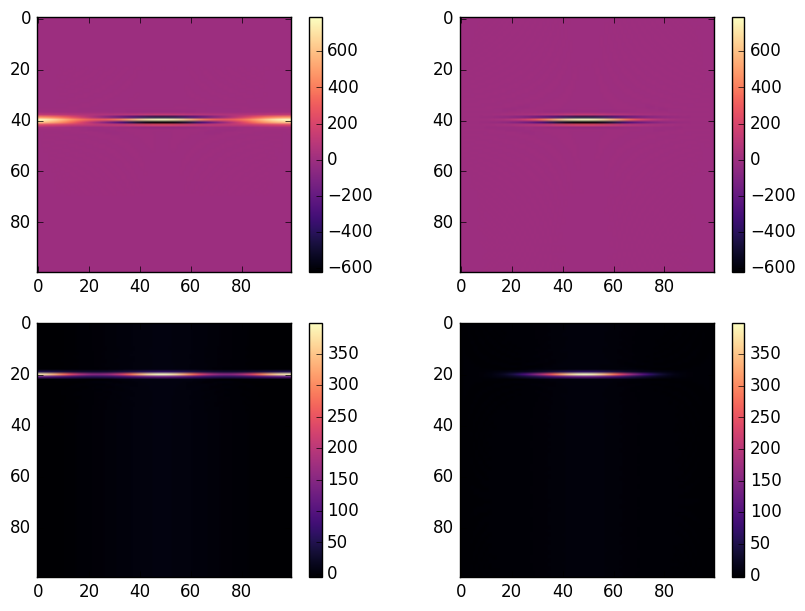

In [79]:
fig = plt.figure("pyplot_subplot",figsize=(10,7));
plt.subplot(221);
plt.imshow(W6_1, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(222);
plt.imshow(W6_2, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(223);
plt.imshow(W6_3, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(224);
plt.imshow(W6_4, cmap=ColorMap("magma"));
colorbar();

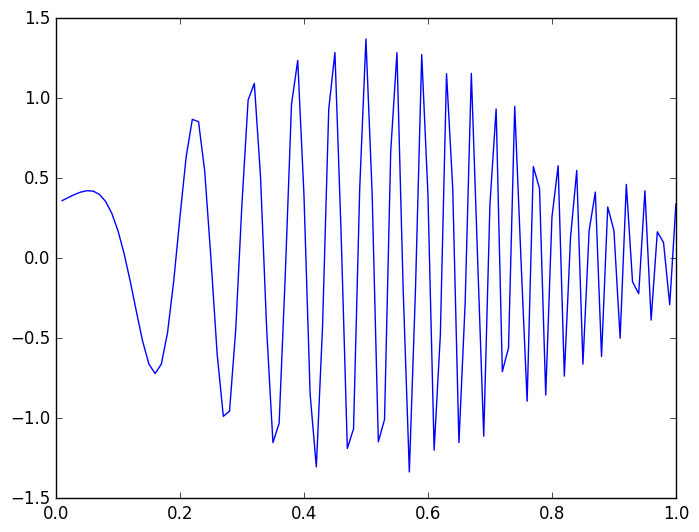

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x322576be0>

In [67]:
x7 = x5.*exp(1im*2*pi*20*t.^2);
plot(t,real(x7))

In [68]:
W7_1 = WVD_da(x7);
W7_2 = WVD_da1(x7);
W7_3 = WVD_da2(x7);
W7_4 = WVD_da3(x7);

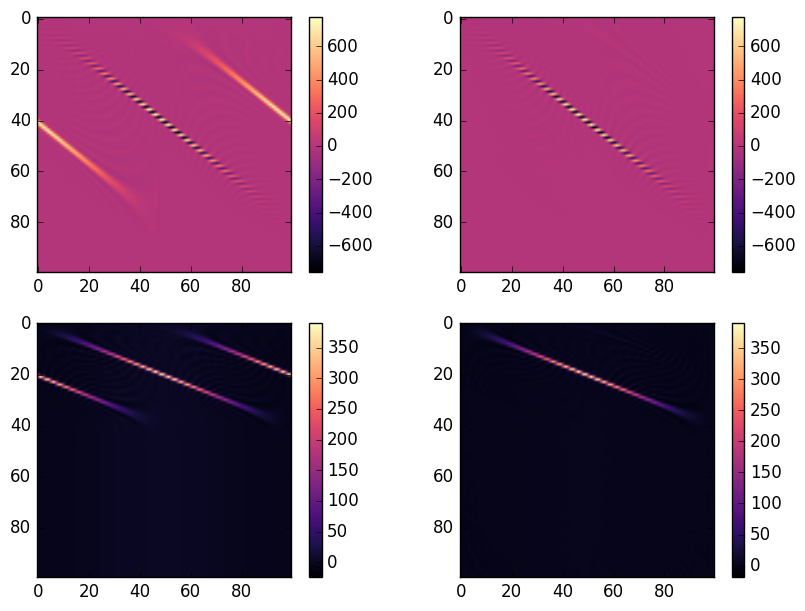

In [70]:
fig = plt.figure("pyplot_subplot",figsize=(10,7));
plt.subplot(221);
plt.imshow(W7_1, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(222);
plt.imshow(W7_2, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(223);
plt.imshow(W7_3, cmap=ColorMap("magma"));
colorbar();
# ------------------------------ 
plt.subplot(224);
plt.imshow(W7_4, cmap=ColorMap("magma"));
colorbar();

Why the time-frequency distribution is not smooth.

Maybe the signal was caused some interferences and oscillations with some boundary or itself?